In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from datetime import datetime
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

Import dataset


In [2]:
#load the dataset
df = pd.read_csv("Gold_data.csv",parse_dates = ['date'])

In [3]:
df

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


We have imported the forcasting dataset using pandas

The dataset contains records from the year 2016 to 2021


The dataset contains 2182 rows and 2 columns


EDA (Data Pre-processing)

In [4]:
df['date'] = pd.to_datetime(df['date'])
df

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [5]:
#basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2182 non-null   datetime64[ns]
 1   price   2182 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 34.2 KB


In [6]:
df.shape

(2182, 2)

In [7]:
df.describe()

,price
count,2182.000000
mean,3284.450046
std,719.564434
min,2252.600000
25%,2697.020000
50%,2879.800000
75%,4147.325000
max,4966.300000


In [8]:
df.median()

price    2879.8
dtype: float64

In [9]:
df.mode()

,date,price
0,2016-01-01,2598.7
1,2016-01-02,2892.7
2,2016-01-03,NaN
3,2016-01-04,NaN
4,2016-01-05,NaN
...,...,...
2177,2021-12-17,NaN
2178,2021-12-18,NaN
2179,2021-12-19,NaN
2180,2021-12-20,NaN


In [10]:
#finfing duplicated/ null values

In [11]:
df.isnull().sum()

date     0
price    0
dtype: int64

In [12]:
df.duplicated().sum()

0

There are no duplicated/null values in the dataset

In [47]:
df.dtypes

date     datetime64[ns]
price           float64
dtype: object

In [48]:
#unique values 
df['date'].unique()

array(['2016-01-01T00:00:00.000000000', '2016-01-02T00:00:00.000000000',
       '2016-01-03T00:00:00.000000000', ...,
       '2021-12-19T00:00:00.000000000', '2021-12-20T00:00:00.000000000',
       '2021-12-21T00:00:00.000000000'], dtype='datetime64[ns]')

In [49]:
df['price'].unique()

array([2252.6, 2454.5, 2708.1, ..., 4389.5, 4354.1, 4346.5])

In [50]:
df.corr()

,price
price,1.0


Visualization

In [13]:
df_eda = df.copy()
df_eda.set_index('date',inplace=True)

Text(0, 0.5, 'Price')

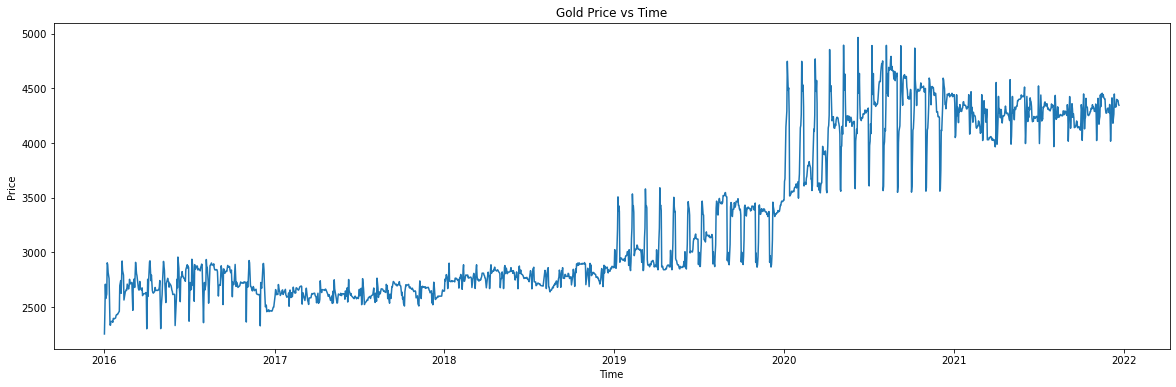

In [14]:
plt.figure(figsize=(20,6))
sns.lineplot(x='date',y='price',data = df)
plt.title('Gold Price vs Time')
plt.xlabel('Time')
plt.ylabel('Price')

(array([ 65., 780., 422.,  49., 187.,  35., 104., 378., 146.,  16.]),
 array([2252.6 , 2523.97, 2795.34, 3066.71, 3338.08, 3609.45, 3880.82,
        4152.19, 4423.56, 4694.93, 4966.3 ]),
 <BarContainer object of 10 artists>)

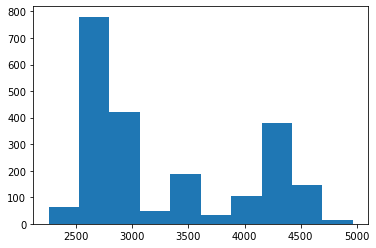

In [15]:
plt.hist(df['price'])

<AxesSubplot:xlabel='price'>

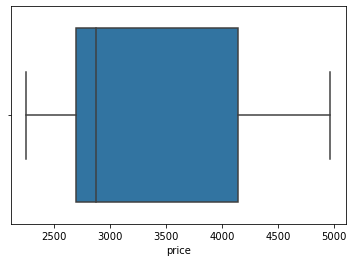

In [16]:
sns.boxplot('price',data=df,orient='h')

No outliers in the data

Using Displot to check the normalility of data

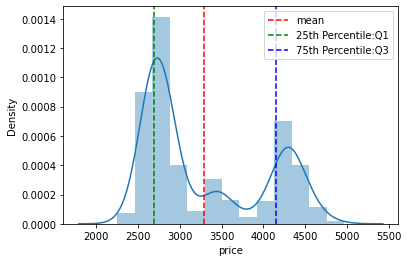

In [17]:
sns.distplot(df['price'])
plt.axvline(x=np.mean(df['price']),c='red',ls = '--',label = 'mean')
plt.axvline(x=np.percentile(df['price'],25),c='green',ls='--',label='25th Percentile:Q1')
plt.axvline(x=np.percentile(df['price'],75),c='blue',ls='--',label='75th Percentile:Q3')
plt.legend()

<Figure size 2160x576 with 0 Axes>

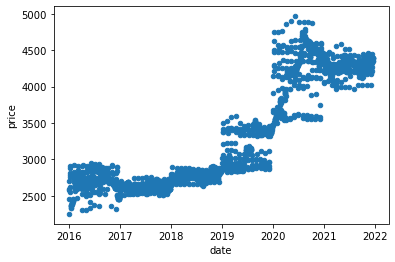

In [18]:
#Scatter plot
plt.figure(figsize=(30,8))
df.plot(kind='scatter',x='date',y='price')
plt.show()

From the above visualizations we can see that there is variation in the prices

Let visualizing the sum of sales using group of price and date and groupby 'Year' 

In [19]:
df=df
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday
df['weekday'] = np.where(df['weekday']==0,7,df['weekday'])
df_year = df[['price','year']].groupby(by='year').sum().reset_index()
df_year

,year,price
0,2016,9.847648e+05
1,2017,9.587369e+05
2,2018,1.015407e+06
3,2019,1.149827e+06
4,2020,1.543195e+06
5,2021,1.514739e+06


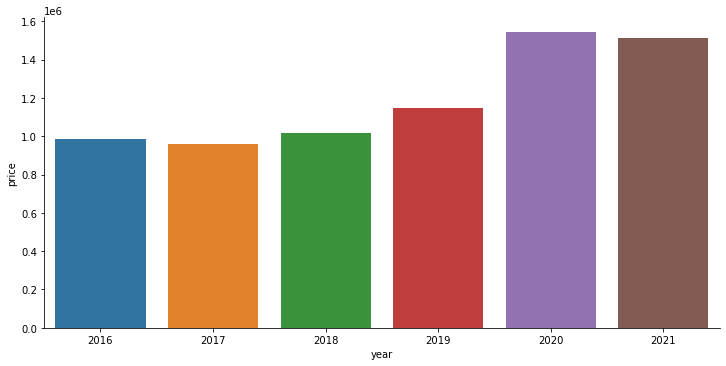

In [20]:
sns.catplot(x='year',y='price',data=df_year,kind='bar',aspect=2)

 Monthly & Yearly(Gold Price)(Trend and Seasonality)

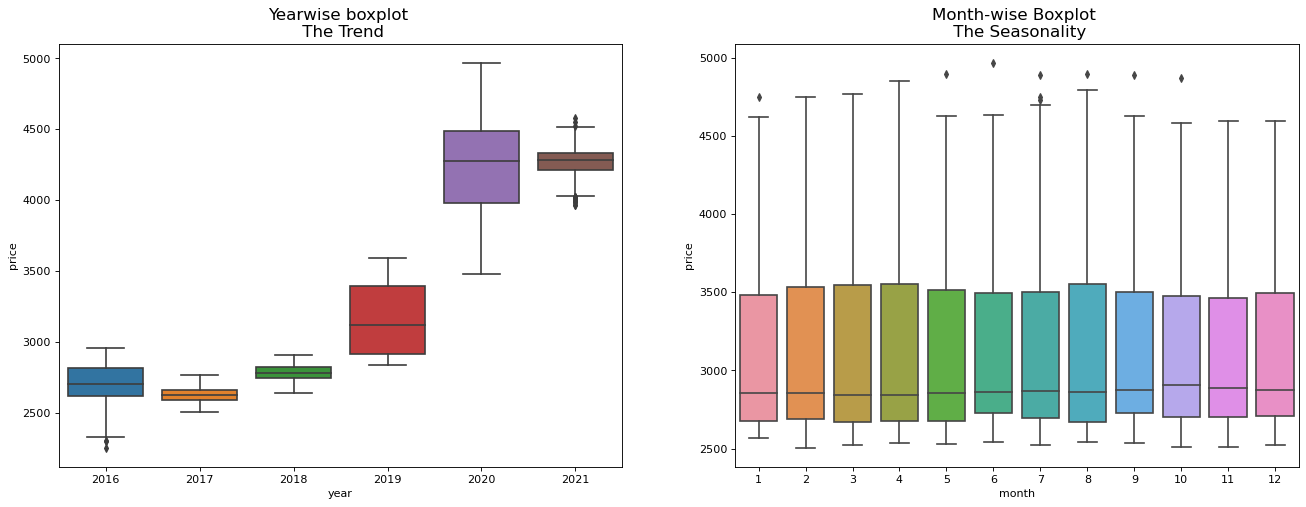

In [21]:
fig,axes = plt.subplots(1,2,figsize=(20,7),dpi=80)
sns.boxplot(x='year',y='price',data=df,ax=axes[0])
sns.boxplot(x='month',y='price',data=df.loc[~df.year.isin([2016,2021]), :])
#set title
axes[0].set_title('Yearwise boxplot \n The Trend',fontsize=15);
axes[1].set_title('Month-wise Boxplot \n The Seasonality',fontsize=15)
plt.show()

Text(0.5, 1.0, 'Weekday Gold Price')

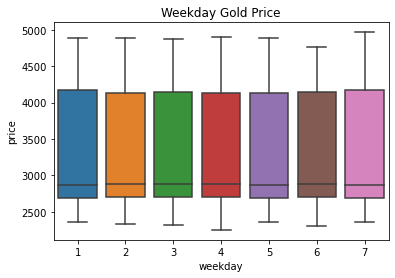

In [22]:
#weekday gold price
box = sns.boxplot(x='weekday',y='price',data=df)
box.set_title('Weekday Gold Price')

Correlation plot
(To understand the correlation between variables we make use of correlation plot,it gives a fair understanding of strengths between differnt variables)

In [23]:
df.corr()

,price,year,month,day,weekday
price,1.000000,0.880318,0.075041,0.023311,-0.000928
year,0.880318,1.000000,-0.010417,-0.008684,-0.000735
month,0.075041,-0.010417,1.000000,0.001173,0.002167
day,0.023311,-0.008684,0.001173,1.000000,-0.002243
weekday,-0.000928,-0.000735,0.002167,-0.002243,1.000000


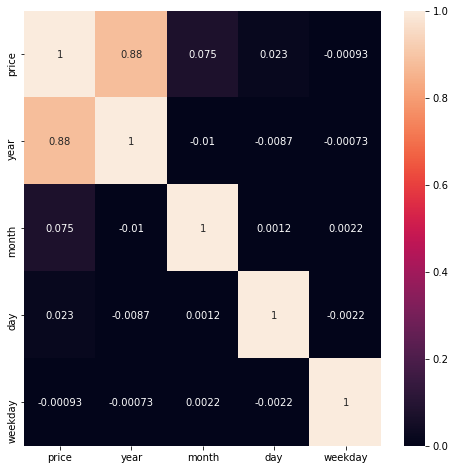

In [24]:
#correlation plot
corr_matrix = df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(data=corr_matrix,annot=True,vmin=0)
plt.show()

The values of the correlation plot ranges from +1(positive correlation) to -1(negative correlation)

# Feature Engineering

In [25]:
#set the date as datetime index
df1 = df.copy()
df1.set_index('date',inplace=True)
df1.index.year

Int64Index([2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016,
            ...
            2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021],
           dtype='int64', name='date', length=2182)

In [26]:
visual =df1.copy()
visual.reset_index(inplace=True)
visual['date'] = pd.to_datetime(visual['date'])
visual['year'] = visual['date'].dt.year
visual['month'] = visual['date'].dt.month
visual['week'] = visual['date'].dt.isocalendar().week
visual['quarter'] = visual['date'].dt.quarter
visual['day_of_week'] = visual['date'].dt.day_name()
visual.drop('date',axis=1,inplace=True)
visual.head(20)

,price,year,month,day,weekday,week,quarter,day_of_week
0,2252.600000,2016,1,1,4,53,1,Friday
1,2454.500000,2016,1,2,5,53,1,Saturday
2,2708.100000,2016,1,3,6,53,1,Sunday
3,2577.800000,2016,1,4,7,1,1,Monday
4,2597.750000,2016,1,5,1,1,1,Tuesday
5,2617.700000,2016,1,6,2,1,1,Wednesday
6,2903.800000,2016,1,7,3,1,1,Thursday
7,2887.800000,2016,1,8,4,1,1,Friday
8,2813.800000,2016,1,9,5,1,1,Saturday
9,2786.800000,2016,1,10,6,1,1,Sunday


In [27]:
visual['year'].unique()

array([2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

In [28]:
#Avg price of gold for each year
df_2016 = visual[visual['year']==2016][['month','price']]
df_2016 = df_2016.groupby('month').agg({'price':'mean'}).reset_index().rename(columns={'price':'2016'})
df_2017 = visual[visual['year']==2017][['month','price']]
df_2017 = df_2017.groupby('month').agg({'price':'mean'}).reset_index().rename(columns={'price':'2017'})
df_2018 = visual[visual['year']==2018][['month','price']]
df_2018 = df_2018.groupby('month').agg({'price':'mean'}).reset_index().rename(columns={'price':'2018'})
df_2019 = visual[visual['year']==2019][['month','price']]
df_2019 = df_2019.groupby('month').agg({'price':'mean'}).reset_index().rename(columns={'price':'2019'})
df_2020 = visual[visual['year']==2020][['month','price']]
df_2020 = df_2020.groupby('month').agg({'price':'mean'}).reset_index().rename(columns={'price':'2020'})
df_2021 = visual[visual['year']==2021][['month','price']]
df_2021 = df_2021.groupby('month').agg({'price':'mean'}).reset_index().rename(columns={'price':'2021'})

df_year = df_2016.merge(df_2017,on='month').merge(df_2018,on='month').merge(df_2019,on='month').merge(df_2020,on='month')\
.merge(df_2021,on='month')

In [29]:
import plotly.graph_objects as go

#top level
top_labels = ['2016','2017','2018','2019','2020','2021']

colors = ['rgb(6,9,14)','rgb(18, 58, 43)',
          'rgb(31, 97, 71)', 'rgb(43, 136, 100)',
          'rgb(55, 174, 129)','rgb(81, 200, 154)',
          'rgb(119, 212, 176)','rgb(158, 224, 199)']
#x-axis value
df_year = df_year[['2016','2017','2018','2019','2020','2021']].replace(np.nan,0)
x_data = df_year.values

#y-axis value(month)
df_2016['month'] = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
y_data = df_2016['month'].tolist()


fig = go.Figure()
for i in range(0,len(x_data[0])):
    for xd,yd in zip(x_data,y_data):
        fig.add_trace(go.Bar(
        x=[xd[i]],y=[yd],
            orientation='h',
            marker = dict(
            color = colors[i],
            line = dict(color='rgb(248,248,249)',width=1)
            ) 
        ))

In [30]:
fig.update_layout(title='Avg Price for each Year',
    xaxis = dict(showgrid = False,
                zeroline=False,domain=[0.15,1]),
     yaxis = dict(showgrid=False,showline=False,
                   showticklabels=False,zeroline=False),
    barmode = 'stack',
    template = 'plotly_white',
    margin = dict(l=0,r=50,t=100,b=10),
        showlegend=False,           
 )

annotations = []
for yd,xd in zip(y_data,x_data):
    #labeling y_axis
    annotations.append(dict(xref='paper',yref='y',
                           x=0.14,y=yd,
                            xanchor='right',
                            text = str(yd),
                            font = dict(family='Arial',size=14,
                                       color = 'rgb(67,67,67)'),
                               showarrow=False,align='right' ))
    #labeling the first likert scale(on the top)
    if yd == y_data[-1]:
                annotations.append(dict(xref ='x',yref='paper',
                                   x=xd[0]/2, y=1.1,
                                    text =top_labels[0],
                                    font = dict(family='Arial',size=14,
                                               color='rgb(67,67,67)'),
                                   showarrow=False))
                space =xd[0]
    for i in range(1,len(xd)):
                #labeling the likert scale
                if yd == y_data[-1]:
                    annotations.append(dict(xref= 'x',yref = 'paper',
                                           x = space +(xd[i]/2),y= 1.1,
                                            text = top_labels[i],
                                            font = dict(family='Arial',size=14,
                                                       color = 'rgb(67,67,67)'),
                                            showarrow = False ))
                space += xd[i]
    fig.update_layout(
       annotations=annotations)
fig.show()        

NameError: name 'space' is not defined

Highest price of gold is in month of Aug to Dec and lowest in Jan to Mar

Pricrs are rising gradually from 2019 to 2021

In [ ]:
import calendar
df_m_sa = visual.groupby("month").agg({'price':'mean'}).reset_index()
df_m_sa['price'] = round(df_m_sa['price'],2)
df_m_sa['month_text'] = df_m_sa['month'].apply(lambda x : calendar.month_abbr[x])
df_m_sa['text'] = df_m_sa['month_text'] + ' - ' + df_m_sa['price'].astype(str)

df_w_sa = visual.groupby('week').agg({'price':'mean'}).reset_index()
df_q_sa = visual.groupby('quarter').agg({'price':'mean'}).reset_index()

#chart color
df_m_sa['color'] = '#496595'
df_m_sa['color'][:-1] = '#c6ccd8'
df_w_sa['color'] = '#c6ccd8'


In [ ]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=2,cols=2,vertical_spacing=0.1,
                   row_heights=[0.7,0.3],
                   specs = [[{'type':'bar'},{'type':'pie'}],
                           [{"colspan":2},None]],
                    column_widths = [0.7,0.3],
                    subplot_titles =('Month wise Avg Price Analysis','Quarter wise Avg Price Analysis',
                                     'Week wise Avg Price Analysis'))
fig.add_trace(go.Bar(x=df_m_sa['price'],y=df_m_sa['month'],marker=dict(color=df_m_sa['color']),
                    text = df_m_sa['text'],textposition='auto',
                    name='Month',orientation='h'),
                    row=1,col=1)
fig.add_trace(go.Pie(values=df_q_sa['price'],labels=df_q_sa['quarter'],name='Quarter',
                    marker=dict(colors=['#334668','#496595','#6D83AA','#91A2BF','#C8D0DF']),hole=0.7,
                    hoverinfo = 'label+percent+value',textinfo = 'label+percent'),
                    row=1,col=2)
fig.add_trace(go.Scatter(x=df_w_sa['week'],y=df_w_sa['price'],mode='lines+markers',fill='tozeroy',fillcolor='#c6ccd8',
                     marker=dict(color= '#496595'), name='Week'), 
                     row=2, col=1)
#styling
fig.update_yaxes(visible=False,row=1,col=1)
fig.update_xaxes(visible=False,row=1,col=1)
fig.update_xaxes(tickmode='array',tickvals = df_w_sa.week,ticktext = [i for i in range(1,53)],
                row=2,col=1)
fig.update_yaxes(visible=False,row=2,col=1)
fig.update_layout(height=750,bargap=0.15,
                 margin=dict(b=0,r=20,l=20),
                 title_text = 'Avg Price Analysis',
                 template='plotly_white',
                 title_font = dict(size=25,color='#8a8d93',family = 'Lato,sans-Serif'),
                 font=dict(color='#8a8d93'),
                 hoverlabel = dict(bgcolor='#f2f2f2',font_size=13,font_family ='Lato,sans=Serif'),
                 showlegend=False)
fig.show()

In [ ]:
import plotly.express as px

df_dw_sa = visual.groupby('day_of_week').agg({'price': 'mean'}).reset_index()
df_dw_sa['price'] = round(df_dw_sa['price'],2)

#chart
fig=px.bar(df_dw_sa,y='day_of_week',x='price',title = 'Avg Price Vs Day of Week',
          color_discrete_sequence = ['#00BFFF'],text= 'price',
          category_orders = dict(day_of_week = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']))
fig.update_yaxes(showgrid=False,ticksuffix = ' ',showline=False)
fig.update_xaxes(visible=False)
fig.update_layout(margin=dict(t=60,b=0,l=0,r=0),height=350,
                 hovermode = 'y unified',
                 yaxis_title = " ",template='plotly_white',
                 title_font = dict(size=25,color='#000000',family='Lato,sans-Serif'),
                 font=dict(color='#000000'),
                 hoverlabel = dict(bgcolor="#c6ccd8",font_size=13,font_family='Lato,sans-Serif'))

Observation


As we saw in the above chart there is an upward trend in price of Gold over the time. Although there are ups and downs at every point in time, generally we can observe that the trend increases. Also we can notice how the ups and downs seem to be a bit regular, it means we might be observing a seasonal pattern here too. Let’s take a closer look by observing some year’s data:

Highest price average price is on Tuesday.

Auguest Month has the Highest price.


# Model Building

Decomposition of Time Series

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

In [ ]:
plt.rcParams.update({'figure.figsize':(18,8),'figure.dpi':75})
result = seasonal_decompose(df_eda,model='additive',period=120)
result.plot()
plt.show()

Trend - Slow moving changes in a time series,responsible for making series gradually increase or decrease over time

Seasonal - Seasonal pattern in a series, the pattern occurs repeatdely over a fixed period of time

Residuals - The behaviour of the time series cannot be explained by trend or seasonality components, also known as white error/noise.

In [ ]:
#plotting rolling statistics
rolmean = df['price'].rolling(12).mean()
rolstd = df['price'].rolling(12).std()

orig = plt.plot(df['price'],color = 'blue',label = 'Original')
mean = plt.plot(rolmean,color='red',label = ' Rolling Mean')
std = plt.plot(rolstd,color='brown',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling mean & Standard Deviation')
plt.show(block=False)

.We observe that rol mean and rol std are not constant w.r.t to time(increasing trend)

.The time series is hence not stationary

# Testing for Stationarity

Time series is stationary if we have constant mean,variance and NO Trend & No Seasonality

But in our dataset we can see uprising trend and also seasonality is present. Hence our data is non-stationary

ADF(Augmentated Dickey-Fuller)Test


In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result = adfuller(df['price'])

In [ ]:
#Ho : It is non-stationary
#H1 : It is stationary

def adfuller_test(price):
    result = adfuller(price)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
        if result[1] <= 0.05:
            print('Reject the null hypothesis. Data is stationary')
        else:
            print('Accept the null hypothesis. Data is non-stationary')
        

In [ ]:
adfuller_test(df['price'])

In [ ]:
df['price first difference'] = df['price'] - df['price'].shift(1)

In [ ]:
df['seasonal first difference'] = df['price'] - df['price'].shift(30)

In [ ]:
# again test adf test
adfuller_test(df['seasonal first difference'].dropna())

In [ ]:
df['seasonal first difference'].plot()

In [ ]:
adfuller_test(df['price first difference'].dropna())

Data is now stationary

## ACF & PACF plots

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['price first difference'].iloc[1:],lags = 40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['price first difference'].iloc[1:],lags=40,ax=ax2)

# Splitting the data

In [ ]:
df = pd.date_range(start = '1/1/2016',end='21/12/2021',freq = 'M')
df

In [33]:
df = pd.read_csv(r"Gold_data.csv")
df

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [34]:
df['date'] = pd.to_datetime(df['date'])
df

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [35]:
df = df.set_index('date')

In [36]:
train = df[df.index.year <= 2020]
test = df[df.index.year >2020]

In [37]:
print(train.shape)
print(test.shape)

(1827, 1)
(355, 1)


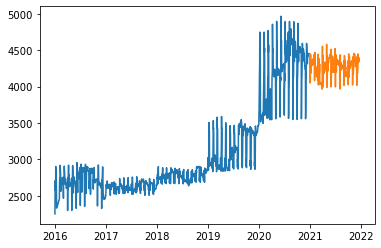

In [38]:
plt.plot(train)
plt.plot(test)
plt.show()

# ARIMA Model

In [39]:
!pip install pmdarima

In [40]:
#figure out order for our arima model
from pmdarima import auto_arima

In [41]:
stepwise_fit = auto_arima(train,trace=True,suppress_warnings = True,seasonal = False)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=22374.613, Time=3.78 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=22546.376, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=22548.368, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=22548.362, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=22544.571, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=22516.950, Time=0.79 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=22518.306, Time=0.72 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=22383.062, Time=2.79 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=22381.946, Time=4.30 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=22538.332, Time=0.76 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=22380.067, Time=3.36 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=22520.203, Time=0.97 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=22353.617, Time=5.63 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=22336.770, Time=6.74 sec
 ARIMA(4,1,2)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1827
Model:               SARIMAX(4, 1, 2)   Log Likelihood              -11159.908
Date:                Mon, 14 Aug 2023   AIC                          22335.816
Time:                        11:40:08   BIC                          22379.895
Sample:                    01-01-2016   HQIC                         22352.075
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1759      0.095      1.845      0.065      -0.011       0.363
ar.L1          1.3237      0.102     12.990      0.000       1.124       1.523
ar.L2         -0.5408      0.091     -5.952      0.000      -0.719      -0.363
ar.L3          0.2019      0.033      6.073      0.000       0.137       0.267
ar.L4         -0.1608      0.021     -7.833      0.000      -0.201      -0.121
ma.L1         -1.4171      0.108    -13.172      0.000      -1.628      -1.206
ma.L2          0.4413      0.105      4.207      0.000       0.236       0.647
sigma2      1.186e+04    133.089     89.082      0.000    1.16e+04    1.21e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             47260.20
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               4.60   Skew:                            -1.77
Prob(H) (two-sided):                  0.00   Kurtosis:                        27.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
from statsmodels.tsa.arima.model import ARIMA
model_arima = ARIMA(train['price'],order=(4,1,2))
result = model_arima.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                 1827
Model:                 ARIMA(4, 1, 2)   Log Likelihood              -11163.532
Date:                Mon, 14 Aug 2023   AIC                          22341.065
Time:                        11:40:10   BIC                          22379.634
Sample:                    01-01-2016   HQIC                         22355.292
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3391      0.094     14.225      0.000       1.155       1.524
ar.L2         -0.5555      0.084     -6.651      0.000      -0.719      -0.392
ar.L3          0.2027      0.033      6.182      0.000       0.138       0.267
ar.L4         -0.1590      0.020     -7.803      0.000      -0.199      -0.119
ma.L1         -1.4288      0.101    -14.193      0.000      -1.626      -1.232
ma.L2          0.4560      0.097      4.706      0.000       0.266       0.646
sigma2      1.195e+04    133.209     89.735      0.000    1.17e+04    1.22e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):             48207.60
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               4.66   Skew:                            -1.81
Prob(H) (two-sided):                  0.00   Kurtosis:                        27.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
test_pred = pd.DataFrame(result.predict(len(train),len(train)+354,type='levels'))
test_pred.index = test.index
test_pred

,predicted_mean
date,
2021-01-01,4420.516697
2021-01-02,4406.322912
2021-01-03,4395.784580
2021-01-04,4385.766298
2021-01-05,4378.489795
...,...
2021-12-17,4383.724360
2021-12-18,4383.724360
2021-12-19,4383.724360


In [44]:
start = len(train)
end = len(train)+len(test)-1
test_pred = pd.DataFrame(result.predict(start = start,end=end,type='levels'))
test_pred_index = test.index
test_pred
test_pred.index = df.index[start:end+1] #to print output in date format
print(test_pred)

            predicted_mean
date                      
2021-01-01     4420.516697
2021-01-02     4406.322912
2021-01-03     4395.784580
2021-01-04     4385.766298
2021-01-05     4378.489795
...                    ...
2021-12-17     4383.724360
2021-12-18     4383.724360
2021-12-19     4383.724360
2021-12-20     4383.724360
2021-12-21     4383.724360

[355 rows x 1 columns]


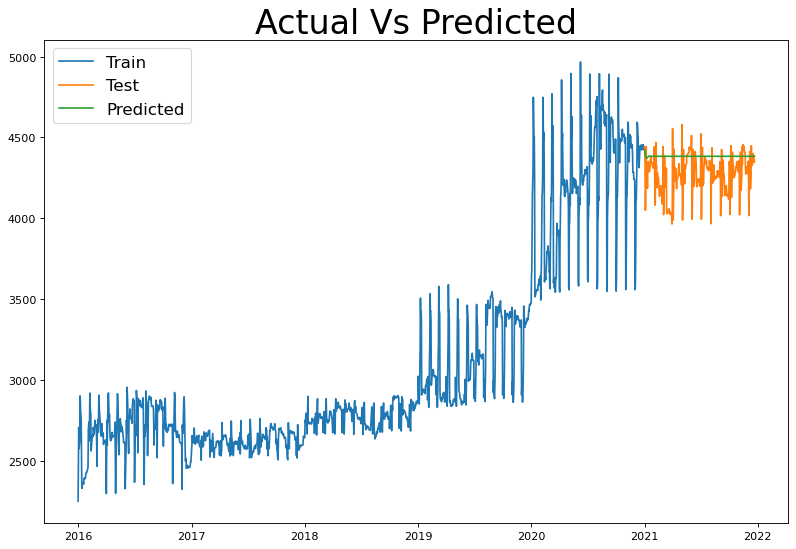

In [45]:
plt.figure(figsize=(12,8),dpi=80)
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(test_pred,label='Predicted')
plt.title('Actual Vs Predicted',size=30)
plt.legend(loc='upper left',fontsize=15)
plt.show()

In [47]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,mean_absolute_error
from math import sqrt

In [49]:
mse = mean_squared_error(test_pred['predicted_mean'],test['price'])
print(f' Mean Squared Error = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f' Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test_pred['predicted_mean'],test['price'])
print(f' Mean Absolute Error (MAE) ',mae)
mape = mean_absolute_percentage_error(test_pred['predicted_mean'],test['price'])
print(f' Mean Absolute Percentage Error (MAPE) = ',mape)

 Mean Squared Error =  26586.69627980545
 Root Mean Squared Error (RMSE) =  163.05
 Mean Absolute Error (MAE)  130.4050181308831
 Mean Absolute Percentage Error (MAPE) =  0.029747460234799


Forecast for 30 days

In [50]:
forecast = result.predict(len(df),len(df)+31,type='levels')
forecast
index_future_dates = pd.date_range(start='2021-12-21',end ='2022-01-21')
forecast.index = index_future_dates
print(forecast)

2021-12-21    4383.72436
2021-12-22    4383.72436
2021-12-23    4383.72436
2021-12-24    4383.72436
2021-12-25    4383.72436
2021-12-26    4383.72436
2021-12-27    4383.72436
2021-12-28    4383.72436
2021-12-29    4383.72436
2021-12-30    4383.72436
2021-12-31    4383.72436
2022-01-01    4383.72436
2022-01-02    4383.72436
2022-01-03    4383.72436
2022-01-04    4383.72436
2022-01-05    4383.72436
2022-01-06    4383.72436
2022-01-07    4383.72436
2022-01-08    4383.72436
2022-01-09    4383.72436
2022-01-10    4383.72436
2022-01-11    4383.72436
2022-01-12    4383.72436
2022-01-13    4383.72436
2022-01-14    4383.72436
2022-01-15    4383.72436
2022-01-16    4383.72436
2022-01-17    4383.72436
2022-01-18    4383.72436
2022-01-19    4383.72436
2022-01-20    4383.72436
2022-01-21    4383.72436
Freq: D, Name: predicted_mean, dtype: float64


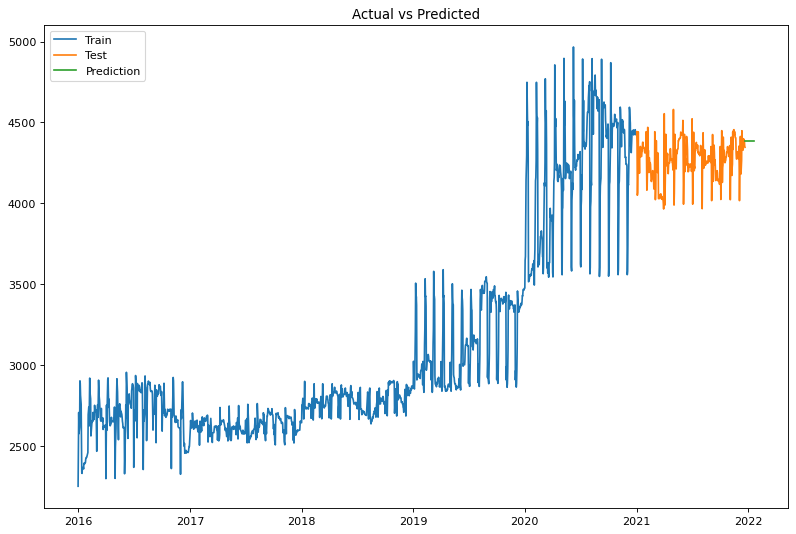

In [51]:
plt.figure(figsize=(12,8),dpi=80)
plt.plot(train,label = 'Train')
plt.plot(test,label='Test')
plt.plot(forecast,label='Prediction')
plt.title('Actual vs Predicted')
plt.legend(loc='upper left',fontsize=10)
plt.show()

<AxesSubplot:>

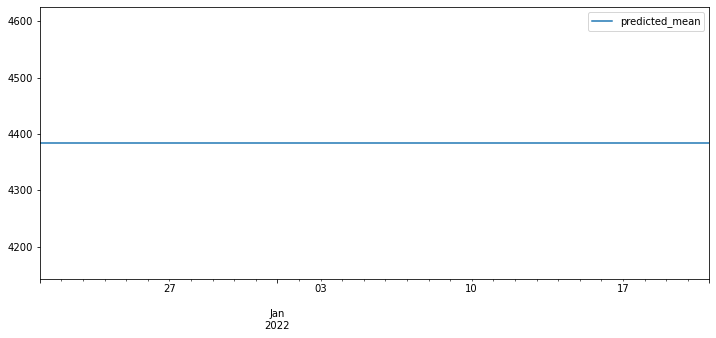

In [53]:
forecast.plot(figsize = (12,5),legend=True)

SARIMA

In [55]:
import itertools
p = range(0,3)
d = range(1,2)
q = range(0,3)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2],22) for x in list(itertools.product(p,d,q))]
print('Examples of parameter combinations for Seasonal ARIMA....')
print('SARIMAX : {} x {}'.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX : {} x {}'.format(pdq[1],seasonal_pdq[2]))
print('SARIMAX : {} x {}'.format(pdq[2],seasonal_pdq[3]))
print('SARIMAX : {} x {}'.format(pdq[2],seasonal_pdq[4]))

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                           order=param,
                                           seasonal_order = param_seasonal,
                                           enforce_stationarity = False,
                                           enforce_invertibility = False)
            results = mod.fit()
            print('ARIMA {}x{}12 - AIC;{}'.format(param,param_seasonal,results.aic))
        except:
            continue

Examples of parameter combinations for Seasonal ARIMA....
SARIMAX : (0, 1, 1) x (0, 1, 1, 22)
SARIMAX : (0, 1, 1) x (0, 1, 2, 22)
SARIMAX : (0, 1, 2) x (1, 1, 0, 22)
SARIMAX : (0, 1, 2) x (1, 1, 1, 22)


In [56]:
model_SA = sm.tsa.SARIMAX(train['price'],order=(0,1,2),seasonal_order=(1,1,1,22))
result_SA = model_SA.fit()
result_SA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                price   No. Observations:                 1827
Model:             SARIMAX(0, 1, 2)x(1, 1, [1], 22)   Log Likelihood              -11169.172
Date:                              Mon, 14 Aug 2023   AIC                          22348.343
Time:                                      12:13:11   BIC                          22375.832
Sample:                                  01-01-2016   HQIC                         22358.489
                                       - 12-31-2020                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0070      0.017      0.414      0.679      -0.026       0.040
ma.L2         -0.1513      0.019     -7.943      0.000      -0.189      -0.114
ar.S.L22      -0.0054      0.026     -0.213      0.832      -0.056       0.045
ma.S.L22      -0.9993      0.269     -3.721      0.000      -1.526      -0.473
sigma2      1.325e+04   3486.611      3.800      0.000    6416.471    2.01e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             44803.11
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               4.81   Skew:                            -1.95
Prob(H) (two-sided):                  0.00   Kurtosis:                        27.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [58]:
test_pred_SA = pd.DataFrame(result_SA.predict(len(train),len(train)+354,type = 'levels'))
test_pred_SA.index = test.index
test_pred_SA

,predicted_mean
date,
2021-01-01,4438.091603
2021-01-02,4438.079567
2021-01-03,4436.990136
2021-01-04,4460.085784
2021-01-05,4457.025156
...,...
2021-12-17,4840.693681
2021-12-18,4856.702134
2021-12-19,4855.184637


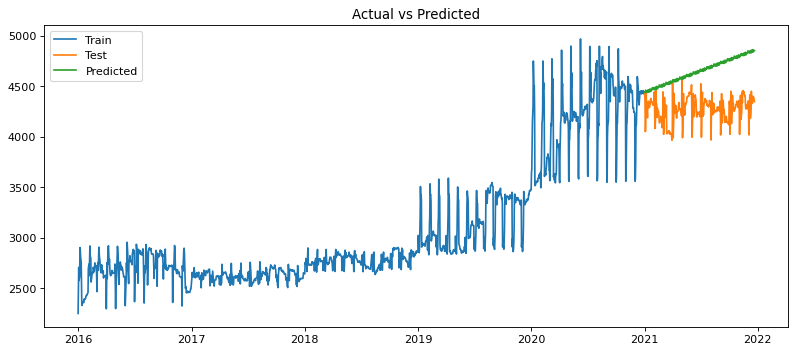

In [62]:
plt.figure(figsize=(12,5),dpi = 80)
plt.plot(train['price'],label = 'Train')
plt.plot(test['price'],label = 'Test')
plt.plot(test_pred_SA,label = 'Predicted')
plt.title('Actual vs Predicted')
plt.legend(loc='upper left',fontsize=10)
plt.show()

In [63]:
mse = mean_squared_error(test_pred_SA['predicted_mean'],test['price'])
print(f'Mean Squared Error(MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mape = mean_absolute_percentage_error(test_pred_SA['predicted_mean'],test['price'])
print(f'Mean Absolute Percentage Error(MAPE) = ',mape)
mae = mean_absolute_error(test_pred_SA['predicted_mean'],test['price'])
print(f'Mean Absolute Error(MAE) = ',mae)

Mean Squared Error(MSE) =  168824.32970747893
Root Mean Squared Error (RMSE) =  410.88
Mean Absolute Percentage Error(MAPE) =  0.08175802497396034
Mean Absolute Error(MAE) =  382.4677371251195


Forecast for next 30 days

In [64]:
forecast_SA = result_SA.predict(len(df),len(df)+31,type='levels')
forecast_SA
index_future_dates = pd.date_range(start= '2021-12-21',end = '2022-01-21')
forecast_SA.index = index_future_dates
print(forecast_SA)

2021-12-21    4873.980964
2021-12-22    4870.712539
2021-12-23    4868.887738
2021-12-24    4860.417789
2021-12-25    4855.642645
2021-12-26    4870.977302
2021-12-27    4870.199331
2021-12-28    4853.311650
2021-12-29    4869.014803
2021-12-30    4878.278404
2021-12-31    4876.378404
2022-01-01    4855.049254
2022-01-02    4869.126386
2022-01-03    4879.688655
2022-01-04    4886.428291
2022-01-05    4878.253437
2022-01-06    4861.001182
2022-01-07    4866.588851
2022-01-08    4882.597305
2022-01-09    4881.079808
2022-01-10    4878.755427
2022-01-11    4876.905338
2022-01-12    4899.876135
2022-01-13    4896.607709
2022-01-14    4894.782908
2022-01-15    4886.312960
2022-01-16    4881.537816
2022-01-17    4896.872473
2022-01-18    4896.094502
2022-01-19    4879.206820
2022-01-20    4894.909973
2022-01-21    4904.173575
Freq: D, Name: predicted_mean, dtype: float64


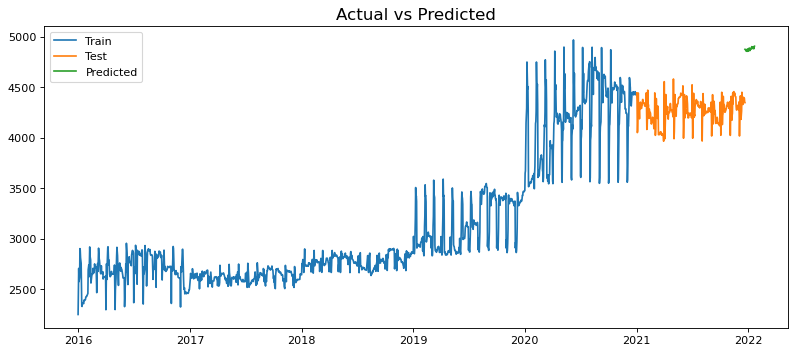

In [65]:
plt.figure(figsize=(12,5),dpi=80)
plt.plot(train['price'],label='Train')
plt.plot(test['price'],label='Test')
plt.plot(forecast_SA,label='Predicted')
plt.title('Actual vs Predicted',fontsize=15)
plt.legend(loc = 'upper left',fontsize=10)
plt.show()

## Holt's Method

In [67]:
#single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
#double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

'''Before starting with the models, we shall first define the weight coefficient Alpha and the Time Period. We also set the DateTime frequency to a monthly level.
#### Set the value of Alpha and define m (Time Period)'''


In [68]:
m = 22
alpha = 1/(2*m)

<AxesSubplot:title={'center':'Holt Winters Single Exponential Smoothing'}, xlabel='date'>

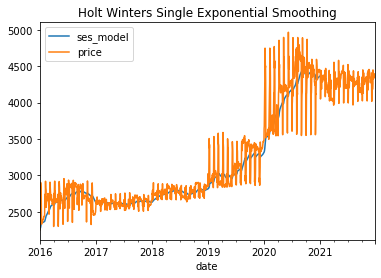

In [69]:
# Simple Exponential Smoothing
df['ses_model'] = SimpleExpSmoothing(train["price"]).fit(smoothing_level=alpha, optimized=False,use_brute=True).fittedvalues
df[['ses_model','price']].plot(title='Holt Winters Single Exponential Smoothing', legend=True)
# df2['ses_model']

<AxesSubplot:title={'center':'Holt Winters Double Exponential Smoothing: Additive & Multiplicative Trend'}, xlabel='date'>

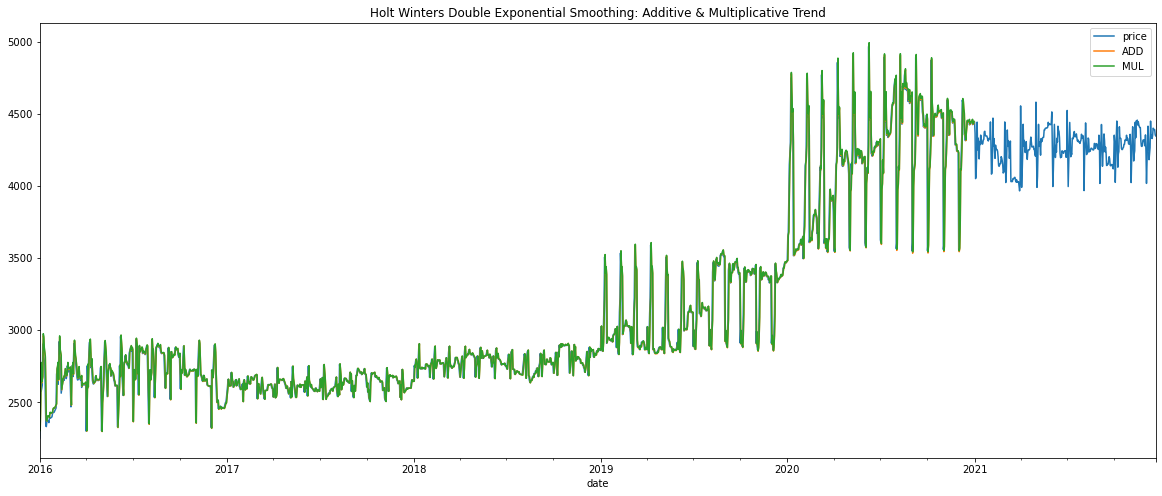

In [72]:
df['ADD'] = ExponentialSmoothing(train['price'],trend='add').fit().fittedvalues
df['MUL'] = ExponentialSmoothing(train['price'],trend='mul').fit().fittedvalues
df[['price','ADD','MUL']].plot(figsize = (20,8),title='Holt Winters Double Exponential Smoothing: Additive & Multiplicative Trend')

In [74]:
#fit the model trend=mul,season=mul

fitted_model = ExponentialSmoothing(train,trend='mul',seasonal='mul',seasonal_periods=11).fit()
test_predictions = fitted_model.forecast(355)
test_predictions.index = df['price'].index[start:end+1] # to print output in date format
print(test_predictions)

date
2021-01-01    4447.198150
2021-01-02    4457.926474
2021-01-03    4475.259939
2021-01-04    4478.596747
2021-01-05    4488.657188
                 ...     
2021-12-17    6884.600832
2021-12-18    6877.118637
2021-12-19    6887.886287
2021-12-20    6904.502473
2021-12-21    6931.348799
Length: 355, dtype: float64


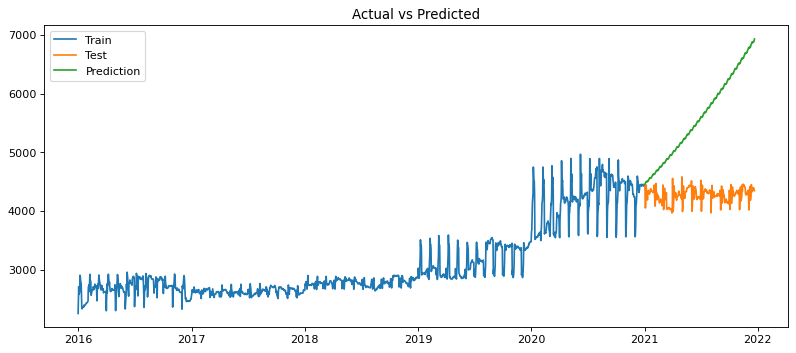

In [75]:
plt.figure(figsize=(12,5),dpi=80)
plt.plot(train['price'],label='Train')
plt.plot(test['price'],label='Test')
plt.plot(test_predictions,label='Prediction')
plt.title('Actual vs Predicted')
plt.legend(loc='upper left',fontsize=10)
plt.show()

In [77]:
mse = mean_squared_error(test,test_predictions)
print(f'Mean Squared Error(MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error(RMSE) = ',rmse)
mape = mean_absolute_percentage_error(test,test_predictions)
print(f'Mean Absolute Percentage Error(MAPE) = ',mape)
mae = mean_absolute_error(test,test_predictions)
print(f'Mean Absolute Error(MAE) = ',mae)

Mean Squared Error(MSE) =  2271688.1235784586
Root Mean Squared Error(RMSE) =  1507.21
Mean Absolute Percentage Error(MAPE) =  0.31294822247884246
Mean Absolute Error(MAE) =  1335.0114968132061


In [80]:
#fit the model trend = 'add',seasonal='mul'
fitted_model = ExponentialSmoothing(train,trend = 'add',seasonal='mul',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(355)
test_predictions.index = df['price'].index[start:end+1]
print(test_predictions)

date
2021-01-01    4440.283545
2021-01-02    4423.173245
2021-01-03    4414.901947
2021-01-04    4418.323891
2021-01-05    4428.349195
                 ...     
2021-12-17    5150.449107
2021-12-18    5154.088917
2021-12-19    5165.430983
2021-12-20    5180.971240
2021-12-21    5166.212694
Length: 355, dtype: float64


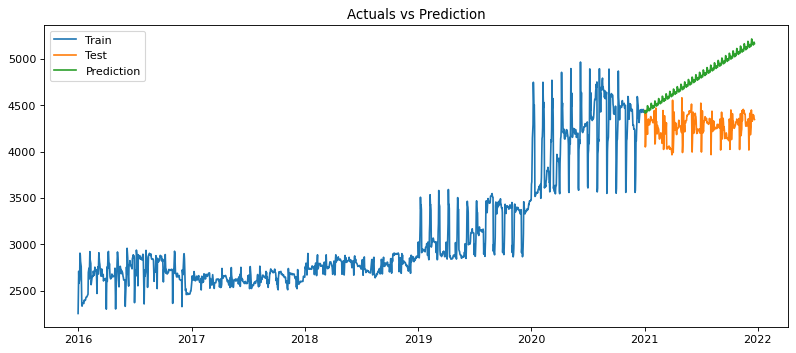

In [81]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(test_predictions, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [82]:
mse = mean_squared_error(test,test_predictions)
print(f'Mean Squared Error(MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error(RMSE) = ',rmse)
mape = mean_absolute_percentage_error(test,test_predictions)
print(f'Mean Absolute Percentage Error(MAPE) = ',mape)
mae = mean_absolute_error(test,test_predictions)
print(f'Mean Absolute Error(MAE) = ',mae)

Mean Squared Error(MSE) =  344619.18908092985
Root Mean Squared Error(RMSE) =  587.04
Mean Absolute Percentage Error(MAPE) =  0.12739092736569751
Mean Absolute Error(MAE) =  541.1924426537952


In [85]:
#fit the model trend = 'mul',seasonal='add'
fitted_model = ExponentialSmoothing(train,trend = 'mul',seasonal='add',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(355)
test_predictions.index = df['price'].index[start:end+1]  #to print output in date format
print(test_predictions)

date
2021-01-01    4449.763616
2021-01-02    4446.514225
2021-01-03    4448.239595
2021-01-04    4455.807149
2021-01-05    4468.298228
                 ...     
2021-12-17    6699.775523
2021-12-18    6709.984652
2021-12-19    6725.120406
2021-12-20    6743.431154
2021-12-21    6738.141913
Length: 355, dtype: float64


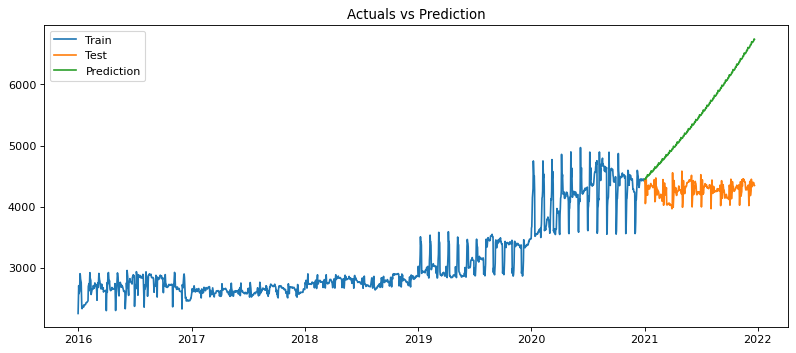

In [86]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(test_predictions, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [87]:
mse = mean_squared_error(test,test_predictions)
print(f'Mean Squared Error(MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error(RMSE) = ',rmse)
mape = mean_absolute_percentage_error(test,test_predictions)
print(f'Mean Absolute Percentage Error(MAPE) = ',mape)
mae = mean_absolute_error(test,test_predictions)
print(f'Mean Absolute Error(MAE) = ',mae)

Mean Squared Error(MSE) =  1987984.6356890951
Root Mean Squared Error(RMSE) =  1409.96
Mean Absolute Percentage Error(MAPE) =  0.293218975604411
Mean Absolute Error(MAE) =  1250.6359158179223


In [88]:
# Fit the model tend='add', season='add'
fitted_model = ExponentialSmoothing(train,trend='add',seasonal='add',seasonal_periods=10).fit()
test_predictions = fitted_model.forecast(355)
test_predictions.index = df['price'].index[start:end+1]   # To print ouput in date format
print(test_predictions)

date
2021-01-01    4475.085785
2021-01-02    4489.097953
2021-01-03    4490.483663
2021-01-04    4483.383379
2021-01-05    4478.088853
                 ...     
2021-12-17    5468.831582
2021-12-18    5482.843749
2021-12-19    5484.229460
2021-12-20    5477.129176
2021-12-21    5471.834650
Length: 355, dtype: float64


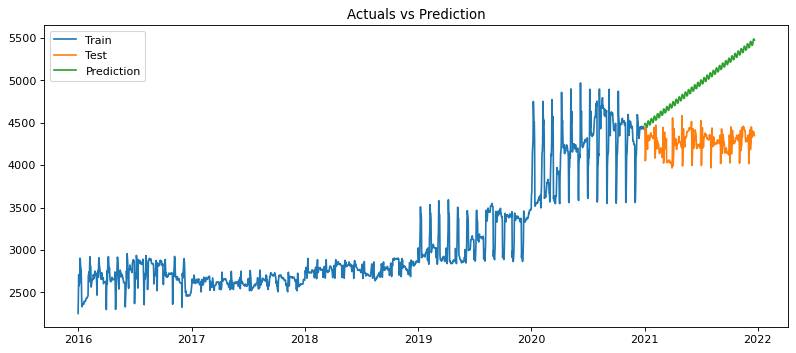

In [89]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(test_predictions, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [91]:
mse = mean_squared_error(test,test_predictions)
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test,test_predictions)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test,test_predictions)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)


Mean Squared Error (MSE) =  566001.1936636902
Root Mean Squared Error (RMSE) =  752.33
Mean Absolute Error (MAE)  =  692.9878226716859
Mean Absolute Percentage Error (MAPE)  =  0.16290032355404474


In [92]:
df['EMA'] = train['price'].ewm(span=22).mean()

In [93]:
df['EMA']

date
2016-01-01    2252.600000
2016-01-02    2358.138636
2016-01-03    2485.550585
2016-01-04    2511.848585
2016-01-05    2532.287586
                 ...     
2021-12-17            NaN
2021-12-18            NaN
2021-12-19            NaN
2021-12-20            NaN
2021-12-21            NaN
Name: EMA, Length: 2182, dtype: float64

In [94]:
df['EMA_t'] = test['price'].ewm(span=22).mean()
df['EMA_t']

date
2016-01-01            NaN
2016-01-02            NaN
2016-01-03            NaN
2016-01-04            NaN
2016-01-05            NaN
                 ...     
2021-12-17    4324.030529
2021-12-18    4329.723526
2021-12-19    4334.921481
2021-12-20    4336.589178
2021-12-21    4337.450989
Name: EMA_t, Length: 2182, dtype: float64

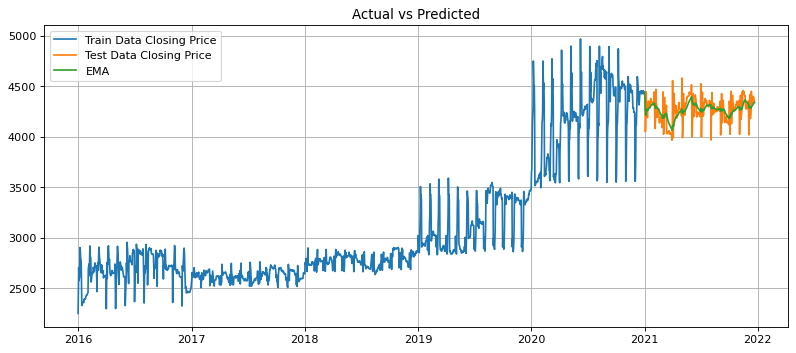

In [95]:
plt.figure(figsize=(12,5),dpi=80)
plt.grid(True)
plt.plot(train['price'],label = 'Train Data Closing Price')
plt.plot(test['price'],label='Test Data Closing Price')
plt.plot(df['EMA_t'],label='EMA')
plt.title('Actual vs Predicted')
plt.legend(loc='upper left',fontsize=10)
plt.legend(loc=2)

In [97]:
df['EMA_t'].dropna()

date
2021-01-01    4443.100000
2021-01-02    4402.431818
2021-01-03    4274.229663
2021-01-04    4214.811582
2021-01-05    4213.095690
                 ...     
2021-12-17    4324.030529
2021-12-18    4329.723526
2021-12-19    4334.921481
2021-12-20    4336.589178
2021-12-21    4337.450989
Name: EMA_t, Length: 355, dtype: float64

In [98]:
mse = mean_squared_error(test['price'],df['EMA_t'].dropna())
print(f'Mean Squared Error(MSE)= ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error(RMSE) = ',rmse)
mape = mean_absolute_percentage_error(test['price'],df['EMA_t'].dropna())
print(f'Mean Absolute Percentage Error(MAPE) = ',mape)
mae = mean_absolute_error(test['price'],df['EMA_t'].dropna())
print(f'Mean Absolute Error(MAE) = ',mae)

Mean Squared Error(MSE)=  8401.060523832122
Root Mean Squared Error(RMSE) =  91.66
Mean Absolute Percentage Error(MAPE) =  0.015729767829439883
Mean Absolute Error(MAE) =  66.8213045119925
